<a href="https://colab.research.google.com/github/AlexBB999/Bridges/blob/master/Bridges_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT EVERYTHING I MAY USE**

In [0]:
% matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro
import statistics
from scipy.stats import normaltest
from scipy.stats import anderson
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive

In [9]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#**The current system for inspecting bridges is expensive, time-consuming and inefficient**

The FHWA requires evaluation of all bridges however; it is costly having a
bi­annual inspection cost of $2.7 billion for the U.S

where  the  average inspection costper bridge ranges from $4,500 to $10,000.  This requires closing lanes for the span of theinspection, which can take 1 to 3 days causing traffic congestions.

**https://catsr.vse.gmu.edu/SYST490/490_2014_BI/BIS_FinalReport.pdf**

**My objective in this project is adding granualrity/priortization to the process to help address at least part of the aforementioned shortcomings.** 

The current system assigns a score called the "Structural Evaluation" to each brude. It is a 10 poitn scale. A score of 4 or less marks the bridge as "Structurally Deficient" -- meaning the bridge needs repairs -- possibly replacement. It now has a priority when allocating limited funds for bridge maintenance. But the scoring of  0,1,2,3,4 is not as granular as need be. For example -- if two bridges have a score of 3 -- which one  do we reapir forst? If we allow decimals hten we might have a score of 3.1 versus 3.5 so we know which is the first to get our limited funds.

#**STAKEHOLDERS**

The stakeholders have been clearly defined in the above quoted article:

The primary stakeholders of the bridge inspection systems are the Federal
Highway Administration (FHWA), District Department of Transportation (DDOT),
Bridge Design Engineers, Bridge Construction Team, and the Inspection Team which are directly involved with the construction and inspection of the bridge. The secondary stakeholders are groups of people that are not directly involved with the construction andinspection but are impacted indirectly such as the traveling public or the Bridge Users.

**My immediate audience (cohorts+instructor+you) are secondary stakeholders. But clearly this is of value to primary stakeholders**.


#**EXPLANATION FOR COULMNS DROPPED BEFORE ANY ANALYSIS**

I am not creating a dashboard so any columns having to do with location/identification are **not** relevent at this time. Thus I have dropped the following columns:

State_code

Record_type

Route_prefix

Route_number

Direction

Highway District

County_code

Place_code

Features_Desc

Location

Kilopoint

Bae_Hwy_network

LRS_Inv_Route

Subroute

Latitude

Longitude

Detour Kilos

Cat 10

Cat 23

Without goiing into the same level of deatil , I have dropped all columns having to do with water/navigation and other irrelevant coluns like Right_curb and Left_curb. I am not staing that this information is not useful -- I am simply simplifying this project. To factor in all 136 features and many subfeatures is not a project -- it's a full-time job.

In [0]:
bridges9 = pd.read_csv('/content/drive/My Drive/2017HwyBridgesDelimitedAllStates.txt', sep=',',encoding='ISO-8859-1',low_memory=False)

**IDENTIFYING FEATURES BY COLUMN NUMBER**

In [0]:
g=list(range(1,137))

In [0]:
z=zip(g,list(bridges9))

In [13]:
list(z)

[(1, 'STATE_CODE_001'),
 (2, 'STRUCTURE_NUMBER_008'),
 (3, 'RECORD_TYPE_005A'),
 (4, 'ROUTE_PREFIX_005B'),
 (5, 'SERVICE_LEVEL_005C'),
 (6, 'ROUTE_NUMBER_005D'),
 (7, 'DIRECTION_005E'),
 (8, 'HIGHWAY_DISTRICT_002'),
 (9, 'COUNTY_CODE_003'),
 (10, 'PLACE_CODE_004'),
 (11, 'FEATURES_DESC_006A'),
 (12, 'CRITICAL_FACILITY_006B'),
 (13, 'FACILITY_CARRIED_007'),
 (14, 'LOCATION_009'),
 (15, 'MIN_VERT_CLR_010'),
 (16, 'KILOPOINT_011'),
 (17, 'BASE_HWY_NETWORK_012'),
 (18, 'LRS_INV_ROUTE_013A'),
 (19, 'SUBROUTE_NO_013B'),
 (20, 'LAT_016'),
 (21, 'LONG_017'),
 (22, 'DETOUR_KILOS_019'),
 (23, 'TOLL_020'),
 (24, 'MAINTENANCE_021'),
 (25, 'OWNER_022'),
 (26, 'FUNCTIONAL_CLASS_026'),
 (27, 'YEAR_BUILT_027'),
 (28, 'TRAFFIC_LANES_ON_028A'),
 (29, 'TRAFFIC_LANES_UND_028B'),
 (30, 'ADT_029'),
 (31, 'YEAR_ADT_030'),
 (32, 'DESIGN_LOAD_031'),
 (33, 'APPR_WIDTH_MT_032'),
 (34, 'MEDIAN_CODE_033'),
 (35, 'DEGREES_SKEW_034'),
 (36, 'STRUCTURE_FLARED_035'),
 (37, 'RAILINGS_036A'),
 (38, 'TRANSITIONS_036B'),


**I HAVE ALREADY DONE SOME FEATURE SELECTION, AS NOTED ABOVE,  SO I AM NOT USING ALL 136 FEATURES**

In [0]:
bridges99 = pd.read_csv('/content/drive/My Drive/2017HwyBridgesDelimitedAllStates.txt', sep=',',usecols=[1,22,23,26,27,29,31,45,47,48,54,59,66,67,71,72,73,74,75,76,106,107,108,109,114,132],encoding='ISO-8859-1',low_memory=False)

**GET AN OVERVIEW OF YOUR DATA**

In [15]:
bridges99.head(20)

,STRUCTURE_NUMBER_008,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,ADT_029,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SCOUR_CRITICAL_113,SUFFICIENCY_RATING
0,00000000000S702,3,62,1999,2.0,50,5,1,5,5,14.7,9.7,8,8,1,44.2,1,32.4,7,7,2,6,0,1,8,100.0
1,00000000000S703,3,62,2002,2.0,159,5,1,5,1,12.9,9.8,8,8,1,84.2,1,34.6,7,6,2,6,0,8,8,100.0
2,0000000000M0022,3,74,1942,2.0,375,4,1,1,4,18.3,9.0,5,5,2,51.7,2,37.2,5,4,1,1,0,0,8,69.5
3,000000883039900,3,67,1974,2.0,300,5,1,5,5,14.0,10.5,7,7,1,44.2,1,26.6,6,6,1,1,0,0,8,90.2
4,000001014002450,3,67,1937,2.0,6200,4,5,3,10,53.3,7.8,6,6,1,40.0,1,23.9,5,2,1,1,0,0,9,49.9
5,000001331700710,3,67,1924,2.0,3620,3,5,4,3,46.9,8.3,5,5,1,58.4,1,35.0,5,2,1,5,0,0,9,61.3
6,000002,3,2,1898,1.0,400,1,1,3,10,30.5,3.7,7,4,1,2.7,1,1.8,2,2,6,6,0,0,5,16.9
7,000004,3,2,1900,1.0,150,2,1,3,10,25.6,3.7,4,4,5,0.0,5,0.0,0,0,6,8,0,0,U,0.0
8,000004504800350,3,67,1939,2.0,350,4,1,1,4,18.3,8.2,7,7,1,47.7,1,28.8,7,4,1,6,0,0,8,72.8
9,000005,3,4,1900,1.0,15,1,1,4,10,7.9,4.8,5,4,1,4.5,1,2.7,2,6,8,7,0,0,4,22.1


In [16]:
bridges99.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615002 entries, 0 to 615001
Data columns (total 26 columns):
STRUCTURE_NUMBER_008       615002 non-null object
TOLL_020                   615002 non-null int64
MAINTENANCE_021            615002 non-null int64
YEAR_BUILT_027             615002 non-null int64
TRAFFIC_LANES_ON_028A      614998 non-null float64
ADT_029                    615002 non-null int64
DESIGN_LOAD_031            615002 non-null object
SERVICE_ON_042A            615002 non-null int64
STRUCTURE_KIND_043A        615002 non-null int64
STRUCTURE_TYPE_043B        615002 non-null int64
MAX_SPAN_LEN_MT_048        615002 non-null float64
DECK_WIDTH_MT_052          614998 non-null float64
DECK_COND_058              615002 non-null object
SUPERSTRUCTURE_COND_059    615002 non-null object
OPR_RATING_METH_063        614951 non-null object
OPERATING_RATING_064       611057 non-null float64
INV_RATING_METH_065        614950 non-null object
INVENTORY_RATING_066       611093 non-null

**THE TARGET IS STRUCTURAL_EVALUATION**

**THIS IS HOW NBI DETERMINES IF BRIDGE IS "STRUCTURALLY DEFICIENT"**

**CREATE NEW FEATURE - MAIN SPAN SURFACE AREA  =MAX_SPAN_LEN_MT_048 X DECK_WIDTH_MT_052**

**THE TOTAL SURFACE AREA OF THE MAIN SPAN HAS BEEN USED IN SOME STUDIES**

In [0]:
bridges99['surface_area']=bridges99['MAX_SPAN_LEN_MT_048']*bridges99['DECK_WIDTH_MT_052']

In [20]:
bridges99.head()

,STRUCTURE_NUMBER_008,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,ADT_029,DESIGN_LOAD_031,SERVICE_ON_042A,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,DECK_COND_058,SUPERSTRUCTURE_COND_059,OPR_RATING_METH_063,OPERATING_RATING_064,INV_RATING_METH_065,INVENTORY_RATING_066,STRUCTURAL_EVAL_067,DECK_GEOMETRY_EVAL_068,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,SCOUR_CRITICAL_113,SUFFICIENCY_RATING,surface_area
0,00000000000S702,3,62,1999,2.0,50,5,1,5,5,14.7,9.7,8,8,1,44.2,1,32.4,7,7,2,6,0,1,8,100.0,142.59
1,00000000000S703,3,62,2002,2.0,159,5,1,5,1,12.9,9.8,8,8,1,84.2,1,34.6,7,6,2,6,0,8,8,100.0,126.42
2,0000000000M0022,3,74,1942,2.0,375,4,1,1,4,18.3,9.0,5,5,2,51.7,2,37.2,5,4,1,1,0,0,8,69.5,164.70
3,000000883039900,3,67,1974,2.0,300,5,1,5,5,14.0,10.5,7,7,1,44.2,1,26.6,6,6,1,1,0,0,8,90.2,147.00
4,000001014002450,3,67,1937,2.0,6200,4,5,3,10,53.3,7.8,6,6,1,40.0,1,23.9,5,2,1,1,0,0,9,49.9,415.74


In [21]:
bridges99['SERVICE_ON_042A'].value_counts()

1    550652
5     53308
6     10074
7       575
4       223
8       170
Name: SERVICE_ON_042A, dtype: int64

**DROP ADT**

In [0]:
bridges99.drop('ADT_029',axis=1,inplace=True)

**HISTOGRAMS OF NUMERICAL FEATURES**

**TO HELP WITH FEATURE ENGINEERING**

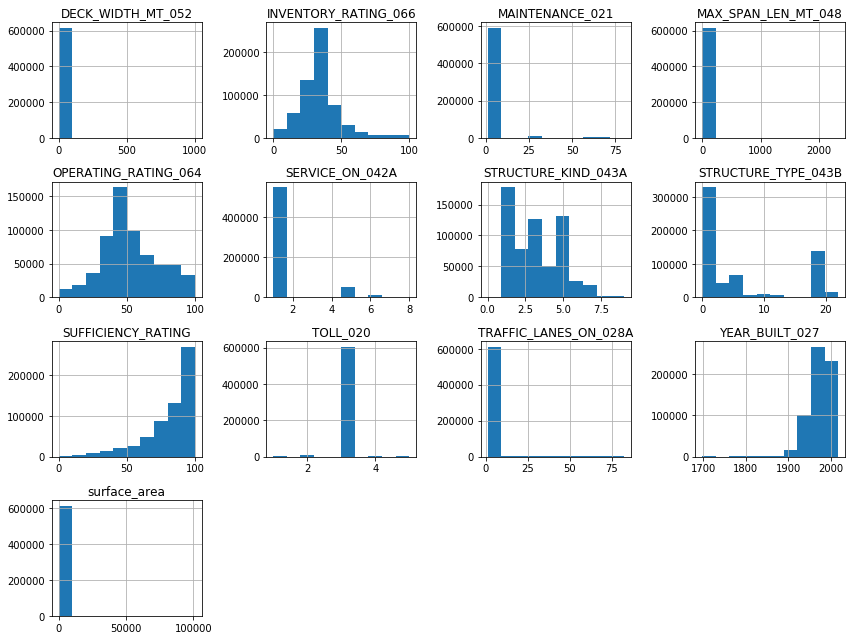

In [23]:
plt.rcParams["figure.figsize"] = [12,9]
bridges99.hist()
plt.tight_layout()

**6.1 METERS IS FEDERAL MINIMUM TO BE A BRIDGE**

**REMOVE BRIDGES LESS THAN 6.1 METERS MAIN SPAN**  (152,926)

**About 25% of the listed bridges meet state definitions of a bridge. I am only looking at those that meet the federal definition**.

In [0]:
bridges99=bridges99[bridges99['MAX_SPAN_LEN_MT_048']>=6.1]

In [26]:
bridges99.shape


(462076, 26)

**REMOVE TOLL ROADS  (7,708)**

**Again simplification with negligible information loss**



In [27]:
bridges99=bridges99[bridges99['TOLL_020']==3]
bridges99.shape

(454368, 26)

In [28]:
bridges99['SERVICE_ON_042A'].value_counts()

1    398511
5     45611
6      9415
7       518
4       160
8       153
Name: SERVICE_ON_042A, dtype: int64

  **KEEP ONLY BRIDGES THAT ARE HIGHWAY OR HIGHWAY-PEDESTRIAN**  (10,246 dropped)

  **Again, I have to limit this project so I am keeping the two designation that make up over 90% of the bridges**.

In [0]:
bridges99=bridges99[bridges99['SERVICE_ON_042A'].isin ([1,5])]

In [33]:
bridges99.shape

(444122, 26)

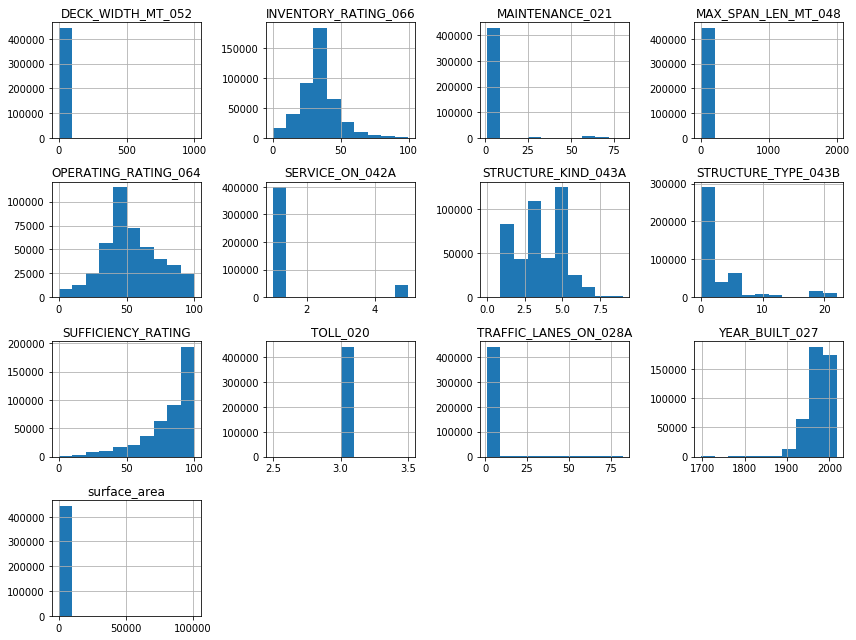

In [31]:
plt.rcParams["figure.figsize"] = [12,9]
bridges99.hist()
plt.tight_layout()

**CREATING SUBSET OF NUMERICAL FEATURES**

In [36]:
n=[col for col in list(bridges99) if bridges99[col].dtype!=object]
n

['TOLL_020',
 'MAINTENANCE_021',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'SERVICE_ON_042A',
 'STRUCTURE_KIND_043A',
 'STRUCTURE_TYPE_043B',
 'MAX_SPAN_LEN_MT_048',
 'DECK_WIDTH_MT_052',
 'OPERATING_RATING_064',
 'INVENTORY_RATING_066',
 'SUFFICIENCY_RATING',
 'surface_area']

**BIVARIATER ANALYSIS**

In [37]:
bridges99[n].corr()

,TOLL_020,MAINTENANCE_021,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,SERVICE_ON_042A,STRUCTURE_KIND_043A,STRUCTURE_TYPE_043B,MAX_SPAN_LEN_MT_048,DECK_WIDTH_MT_052,OPERATING_RATING_064,INVENTORY_RATING_066,SUFFICIENCY_RATING,surface_area
TOLL_020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAINTENANCE_021,NaN,1.000000,-0.004705,-0.096098,0.014173,0.038152,0.010383,-0.021552,-0.080555,-0.054993,-0.021450,-0.042374,-0.045276
YEAR_BUILT_027,NaN,-0.004705,1.000000,0.058861,-0.058628,0.251657,-0.005105,0.151512,0.093737,0.315252,0.333509,0.547612,0.127908
TRAFFIC_LANES_ON_028A,NaN,-0.096098,0.058861,1.000000,0.197378,0.014045,-0.003039,0.170874,0.682829,0.135072,0.119839,0.090178,0.460076
SERVICE_ON_042A,NaN,0.014173,-0.058628,0.197378,1.000000,0.001619,0.014328,0.098996,0.249944,0.094787,0.075496,-0.030905,0.155390
STRUCTURE_KIND_043A,NaN,0.038152,0.251657,0.014045,0.001619,1.000000,-0.209207,0.225813,0.056763,0.098242,0.073540,0.136315,0.146379
STRUCTURE_TYPE_043B,NaN,0.010383,-0.005105,-0.003039,0.014328,-0.209207,1.000000,-0.067422,-0.103842,-0.019543,0.009957,-0.019383,-0.062586
MAX_SPAN_LEN_MT_048,NaN,-0.021552,0.151512,0.170874,0.098996,0.225813,-0.067422,1.000000,0.230611,0.155941,0.111240,0.087012,0.732471
DECK_WIDTH_MT_052,NaN,-0.080555,0.093737,0.682829,0.249944,0.056763,-0.103842,0.230611,1.000000,0.192741,0.162783,0.176572,0.594568
OPERATING_RATING_064,NaN,-0.054993,0.315252,0.135072,0.094787,0.098242,-0.019543,0.155941,0.192741,1.000000,0.877657,0.542627,0.156264


**HEATMAP**

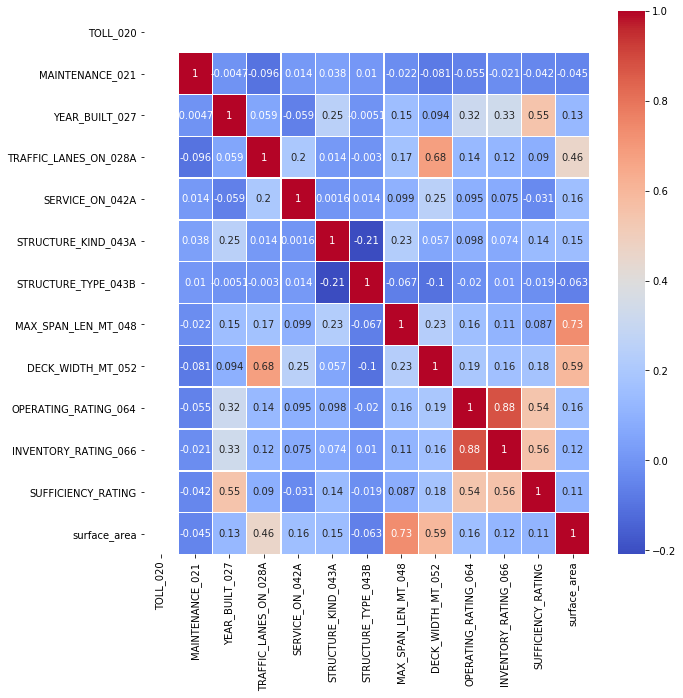

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(bridges99[n].corr(),annot=True,linewidth=0.5,cmap='coolwarm')

**OVERALL NOT MUCH CORREALTION -- I WILL DROP ONE OR TWO FEATURES LIKE OPERATOR RATING**

  **CREATING SUBSET OF OBJECT FEATURES**

In [34]:
k=[col for col in list(bridges99) if bridges99[col].dtype==object]
k

['STRUCTURE_NUMBER_008',
 'DESIGN_LOAD_031',
 'DECK_COND_058',
 'SUPERSTRUCTURE_COND_059',
 'OPR_RATING_METH_063',
 'INV_RATING_METH_065',
 'STRUCTURAL_EVAL_067',
 'DECK_GEOMETRY_EVAL_068',
 'DECK_STRUCTURE_TYPE_107',
 'SURFACE_TYPE_108A',
 'MEMBRANE_TYPE_108B',
 'DECK_PROTECTION_108C',
 'SCOUR_CRITICAL_113']

**STILL DOING EDA**

In [0]:
bridges99['TRAFFIC_LANES_ON_028A'].value_counts(dropna=False)

2.0     350027
1.0      36760
4.0      23885
3.0      16841
5.0       6087
6.0       5521
8.0       1662
7.0       1404
10.0       688
9.0        517
12.0       256
11.0       221
13.0        90
14.0        76
20.0        32
15.0        15
16.0         9
50.0         5
40.0         5
17.0         4
NaN          3
45.0         2
18.0         2
22.0         2
21.0         1
82.0         1
30.0         1
19.0         1
60.0         1
25.0         1
70.0         1
80.0         1
Name: TRAFFIC_LANES_ON_028A, dtype: int64

In [0]:
bridges99.groupby('YEAR_BUILT_027')['YEAR_BUILT_027'].count()

YEAR_BUILT_027
1697       1
1764       1
1765       1
1789       1
1792       2
        ... 
2013    4372
2014    4184
2015    3830
2016    2909
2017     168
Name: YEAR_BUILT_027, Length: 210, dtype: int64

**CHECKING NaN**

In [0]:
bridges99.isna().sum()

STRUCTURE_NUMBER_008          0
TOLL_020                      0
MAINTENANCE_021               0
YEAR_BUILT_027                0
TRAFFIC_LANES_ON_028A         3
ADT_029                       0
DESIGN_LOAD_031               0
SERVICE_ON_042A               0
STRUCTURE_KIND_043A           0
STRUCTURE_TYPE_043B           0
MAX_SPAN_LEN_MT_048           0
DECK_WIDTH_MT_052             0
DECK_COND_058                 0
SUPERSTRUCTURE_COND_059       0
OPR_RATING_METH_063          37
OPERATING_RATING_064       2587
INV_RATING_METH_065          38
INVENTORY_RATING_066       2577
STRUCTURAL_EVAL_067           0
DECK_GEOMETRY_EVAL_068        0
DECK_STRUCTURE_TYPE_107       0
SURFACE_TYPE_108A             1
MEMBRANE_TYPE_108B            1
DECK_PROTECTION_108C          1
SCOUR_CRITICAL_113            0
SUFFICIENCY_RATING            0
dtype: int64